Feature Selection-Information gain - mutual information In Regression Problem Statements
Mutual Information
Estimate mutual information for a continuous target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

In [7]:
data = load_diabetes()

In [8]:
X = pd.DataFrame(data.data)
X.head()

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [9]:
y = data.target

In [10]:
X_train , X_test , y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [11]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train, y_train)

In [12]:
mutual_info

array([0.        , 0.01646741, 0.23600976, 0.06672592, 0.0819504 ,
       0.        , 0.09298367, 0.14708445, 0.13019912, 0.15133026])

In [14]:
mutual_info_ = pd.Series(mutual_info)
mutual_info_.index = X_train.columns
mutual_info_.sort_values(ascending=False)

2    0.236010
9    0.151330
7    0.147084
8    0.130199
6    0.092984
4    0.081950
3    0.066726
1    0.016467
0    0.000000
5    0.000000
dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '2'),
  Text(1, 0, '9'),
  Text(2, 0, '7'),
  Text(3, 0, '8'),
  Text(4, 0, '6'),
  Text(5, 0, '4'),
  Text(6, 0, '3'),
  Text(7, 0, '1'),
  Text(8, 0, '0'),
  Text(9, 0, '5')])

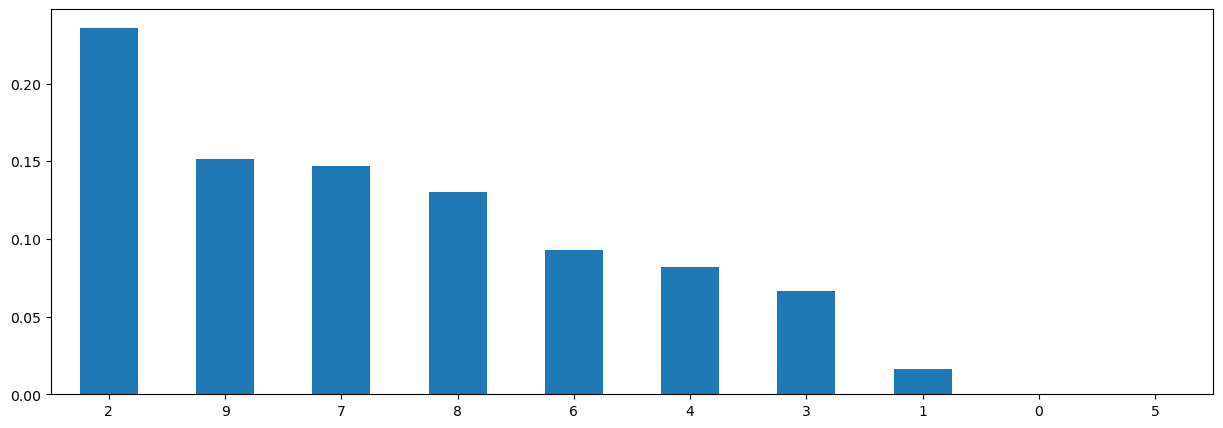

In [24]:
mutual_info_.sort_values(ascending=False).plot.bar(figsize=(15,5))
plt.xticks(rotation = 0)